# COMP0041 Applied Computational Finance

### Revision

***
#### Introduction
This notebook is to practice the necessary Python topics that will be tested on the exam. <br>
This includes: <br>
- [x] General conversions.
- [x] Maths functions.
- [x] NumPy.
- [x] SciPy.
- [x] Matplotlib.
- [x] Monte Carlo & Simulation techniques.
- [x] Option pricing via simulations.


## General Conversions in Python

In general, we are unlikely to have the data in the form that we want it. This means that we need to convert our data type from one thing to another – and make sure that we haven't lost or altered anything along the way. This means we need to know about the different data structures. The main ones are:
- Lists.
- Tuples.
- Sets.
- Dicts.
- Arrays. _(See NumPy)_
<br><br>

A useful table to understand what can and can't be done to the different data structures: <br>

| | Indexing | Ordered | Mutable | Duplicate |
|---|---|---|---|---|
|__List__|<mark>Yes</mark>|<mark>Yes</mark>|<mark>Yes</mark>|<mark>Yes</mark>|
|__Tuple__|<mark>Yes</mark>|<mark>Yes</mark>|`No`|<mark>Yes</mark>|
|__Set__|`No`|`No`|<mark>Yes</mark>|`No`|
|__Dict__|`No`|<mark>Yes</mark>|<mark>Yes</mark>|`No`|

## Maths Functions

As you might expect, there is nothing really to explain about the functions within the __math__ module. They are, by definition, maths functions. For instance, one can find _math.sin(...)_ which is obviously the sin() function. Therefore the quickest way to understand the maths functions is to use the __dir()__ method and take a look what is inside. 

In [4]:
import math as m
#dir(math)

#'__doc__',
#'__file__',
#'__loader__',
#'__name__',
#'__package__',
#'__spec__'

What we can do though is try and write some functions that will calculate mathematical expressions.
\begin{equation*}
    \sqrt{2 \pi x^{3}} e^{\left( 1+\frac{2}{x^{2}} \right)}
\end{equation*}


In [5]:
def myfunction1(x):
    x = float(x)
    y = m.sqrt(2*m.pi*x**3) * m.exp(1+(2/x**2))
    return y

myfunction1(4)


61.767669163941925

## NumPy & SciPy

NumPy and SciPy are both extensive packages. NumPy is particularly useful for mathematical operations involving arrays (vectors) and matrices. The flagship is ndarray, which we have come across many time before. SciPy is good for statsitical tests and optimisation procedures (although NumPy does have some as well). <br>
<br>
Naturally, we can't cover everything there is to know, so we will focus on the things we need for later use (e.g. Monte Carlo), and that is random number generation. <br>
<br>
Unlike COMP0043 Numerical Methods, we won't be implementing random number generators ourselves, we will be relying on the inbuilt functionality of NumPy and SciPy. Still its important to know which module/library they fall under and the subtle difference between them. 

For NumPy random numbers are found in the `random` package. <br>
For SciPy random numbers are found in the `stats` package. 

In [5]:
import numpy as np
import numpy.random as npr

import scipy as scipy 
import scipy.stats as sps

The most straightforward uniform random number generator.

In [6]:
x = npr.rand(3,2,4) # The syntax is rand(number of instances, rows, columns)
print(x)

[[[0.84597284 0.24039014 0.93493649 0.0369312 ]
  [0.60129715 0.22503222 0.90846372 0.77047031]]

 [[0.17742323 0.2402356  0.66742946 0.66417559]
  [0.99593986 0.2008236  0.36397727 0.65153336]]

 [[0.38914551 0.73737344 0.55847621 0.74598611]
  [0.32826058 0.84002226 0.20394614 0.07994536]]]


The random package can be used to shuffle data, if required.

In [7]:
import random
a = [1,2,3,4,5,6,7,8,9,10]
random.shuffle(a)
print(a)

[3, 7, 5, 9, 2, 8, 1, 10, 4, 6]


There are a great deal of random number generators from specific distributions. We will focus on:
- Uniform.
- Normal.

### Uniform 

In [10]:
b = npr.uniform(0,1)
c = npr.uniform()
print(b,c)

d = npr.uniform(3,6)
print(d)

0.6476375741047722 0.09911494244617036
3.961671059997384


As we can see, calling no values or the values (0,1) will have the same result. It is only when we try a wider range that the parameters passed make a difference. <br> <br> We can also pass another parameter, that is the size of the matrix of random numbers we want (as a tuple).

In [12]:
b = npr.uniform(2,4,(3,3))
print(b)

[[3.83063174 2.45917766 3.5962145 ]
 [2.17504928 2.83346966 2.03862969]
 [2.54876787 2.06972866 3.61665379]]


### Normal

In [13]:
b = npr.normal()
c = npr.normal(0,1)
print(b,c)

d = npr.normal(150,10)
print(d)

0.370847267115905 -1.3210060521549687
154.11156210753296


Just as before we have the _.normal()_ function, which performs exactly the same. 

In [14]:
b = npr.normal(0,1,(5,2))
print(b)

[[ 0.09423926  0.607427  ]
 [ 1.39520322  0.51109159]
 [-1.0199918  -0.01866683]
 [-1.67167649  0.15674544]
 [-0.74222625 -0.6719283 ]]


By using the __seed__ method we can essentially make our 'random' simulations repeatable. <br> <br> Check the following against the SciPy notebook. They are the same numbers!

In [15]:
npr.seed(786)
npr.normal(0,1,(2,2))

array([[-0.79930737,  1.06550136],
       [-0.24645913,  0.85680645]])

The _.random()_ method is the same as the _.uniform()_ when no paramters are passed. When paramters are passed, they differ slightly. 

In [18]:
b = npr.uniform()
c = npr.random()
print(b,c)

0.3347059990062945 0.28331633186738947


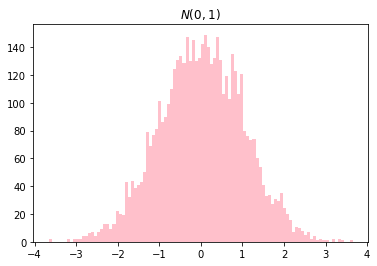

In [19]:
### Standard normals ###
import matplotlib.pyplot as plt
X = npr.standard_normal(5000)
plt.hist(X,bins=100, color='pink')
plt.title('$N(0,1)$')
plt.show()

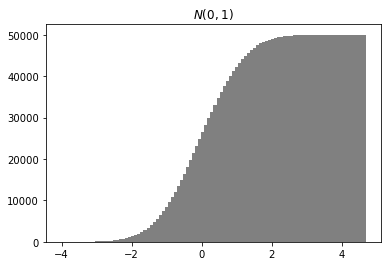

In [20]:
X = npr.standard_normal(50000)
plt.hist(X,bins=100, cumulative = True, color='grey') # Note the inclusion of cumulative=True 
plt.title('$N(0,1)$')
plt.show()

## Matplotlib

This section is on the use of Matplotlib. This is purely focused on graphing, as the exam will contain one question that asks us to replicate the graph. <br>
Of course matplotlib is enormous and we can't cover everything here. So for more details see the documentation. <br>

Firstly, we need to import the packages. There are three different things to consider: <br>
- matplotlib.pyplot -- This is for general plotting.
- cufflinks -- This allows for plotting directly from Pandas dataframes.
- plotly -- This is for fancier looking plots than matplotlib.

In [9]:
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly as plotly
import numpy as np

If we simply wanted to plot some graphs we can simply pass the data to the plot function. <br>
In our Jupyter notebook, we don't need the function __plt.show()__ as we have inline plotting functionality enabled. However, for the exam and to be prudent we should probably always put that after the _.plot_ function.

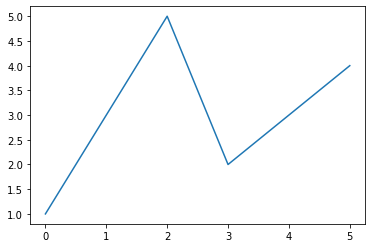

In [5]:
plt.plot([1,3,5,2,3,4])
plt.show()

If we didn't have the __plt.show()__ function listed. There would be a long string of characters indicating where in the memory the graph is currently stored. We can get rid of that by using a semicolon. Like so,

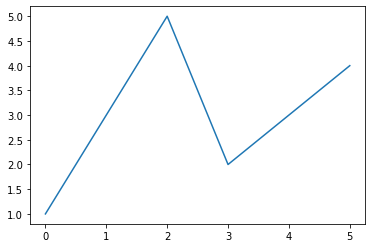

In [3]:
plt.plot([1,3,5,2,3,4]);

We could also pass an $x$ list and a $y$ list, provided they are the same length.

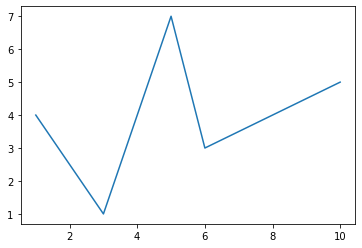

In [6]:
plt.plot([1,3,5,6,10],[4,1,7,3,5])
plt.show()

Using the _plt.show()_ function at the end allows us to plot multiple lines on the same graph.

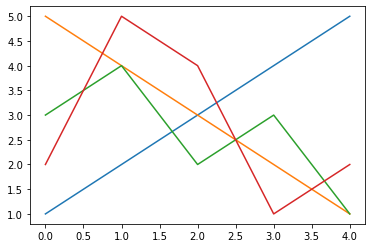

In [7]:
plt.plot([1,2,3,4,5])
plt.plot([5,4,3,2,1])
plt.plot([3,4,2,3,1])
plt.plot([2,5,4,1,2])
plt.show()

So far we have only really been giving $y$ co-ordinates. We can now specify the specific $x$ domain over which we want our function to be plotted using the __linspace__ function (similar to MATLAB). However, we need to be careful because of the way the linspace function divides up the line. Let's look at some examples:

In [11]:
x1 = np.linspace(0,10,100) # The syntax is linspace(first,last,number of points)
print(x1[0:5])

[0.        0.1010101 0.2020202 0.3030303 0.4040404]


As we can see the points are not as expected, i.e. they are not 0.1 spaced. This is because the _linpsace_ function produces 100 equally spaced points and since the end points are included there are really only 99 'gaps' between points. <br>
For the 'gaps' to be as expected, we would need to use the _arange_ function.
<br><br>
The arange function is better for integer steps, the linspace function is better for non-integer steps in general. 

In [16]:
x2 = np.arange(1,100,10) # The syntax is arange(first,last,step-size)
print(x2)

[ 1 11 21 31 41 51 61 71 81 91]


Writing things this way allows us to pass our $x$ range to a function and plot it.

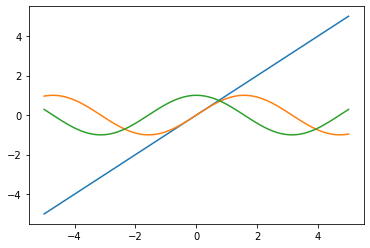

In [22]:
x3 = np.linspace(-5,5,100)
y1 = x3
y2 = np.sin(x3)
y3 = np.cos(x3)

plt.plot(x3,y1,x3,y2,x3,y3)

# We can save these graphs using the traditional methods
plt.savefig("/Users/harry/Desktop/test_figure.png")

For some reason we cannot both __.show()__ and __.savefig()__ at the same time. See what happens when you save this figure.

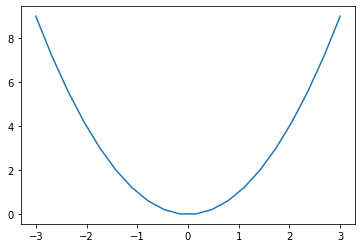

<Figure size 432x288 with 0 Axes>

In [24]:
x4 = np.linspace(-3,3,20)
y4 = x4**2

plt.plot(x4,y4)
plt.show()

plt.savefig('/Users/harry/Desktop/test_figure2.png')

Now we have the basics, we move onto ways to make the graphs look better. There are a million ways to do so, its simply about calling the right methods and knowing the right codes.

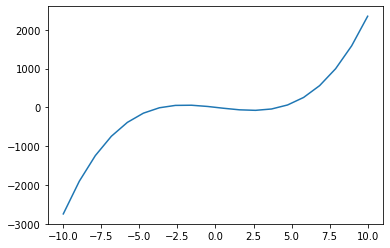

In [31]:
x5 = np.linspace(-10,10,20)
y5 = 3*x5**3 - 2*x5**2 -45*x5 + 2

plt.plot(x5,y5)
plt.show()

Let's add some titles and axis labels. 

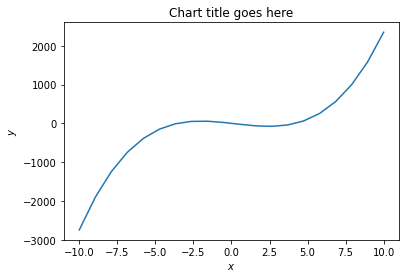

In [36]:
plt.title('Chart title goes here') # Specify the title
plt.xlabel('$x$') # Specify the x-axis
plt.ylabel('$y$') # Specify the y-axis
plt.plot(x5,y5) 
plt.show()

We can also do a legend, but this of course requires multiple plots. 

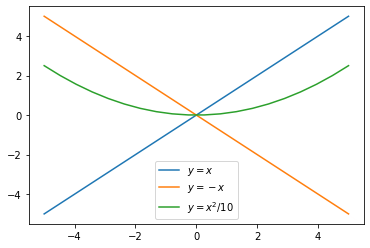

In [43]:
x6 = np.linspace(-5,5,20)
y6a = x6
y6b = -x6
y6c = 0.1*x6**2

plt.plot(x6,y6a, label='$y=x$')
plt.plot(x6,y6b, label="$y=-x$")
plt.plot(x6,y6c, label="$y=x^2/10$")
plt.legend()
plt.show()

Now we come to the specifics of each line. This include the colour, linestyle, and marker. <br>
Each of these requires the following keyword argument:
- color = "..." 
- marker = "..." 
- linestyle = "..." --- which can also be written as ls = '...' 
<br><br>
There is also a straightforward one called lineqidth
- linewidth = number --- which can also be written as lw = ... 

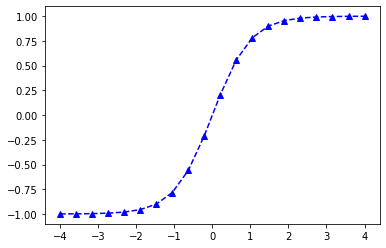

In [51]:
x7 = np.linspace(-4,4,20)
y7 = np.tanh(x7)
plt.plot(x7,y7,linestyle='--',color='blue',marker='^')

At this point there are a million different combinations that can be used. Here is a list of some:
- __Linestyle__
    - 'symbol' --> the symbol of the main styles e.g. '.' (dotted)
    - 'name' --> the name of the style e.g. 'dashdot'

- __Color__
    - 'shorthand' --> the shorthand of the main colors e.g. 'r' (red)
    - 'name' --> the name of the colour e.g. 'blue'
    - '0-1 number' --> grayscale between 0 and 1 e.g. '0.62'
    - 'hexadecimal' --> HTML hexadecimal color e.g. '#AF601A'
    - (num,num,num) --> set of RGB numbers e.g. (0.1,0.4,0.9)

- __Marker__
    - '.' --> dots
    - 'o' --> circles
    - '*' --> stars
    - 's' --> squares
    - 'H' --> hexagons
    - '^' --> triangles

Let's put together a full graph showing what we have so far.

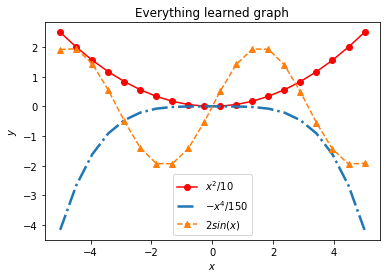

In [65]:
x8 = np.linspace(-5,5,20)
y8a = x8**2/10
y8b = -x8**4/150
y8c = 2*np.sin(x8)

plt.title('Everything learned graph')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.plot(x8,y8a,'-ro', label='$x^2/10$' )
plt.plot(x8,y8b,linestyle='dashdot',lw=2.5,label='$-x^4/150$')
plt.plot(x8,y8c,ls='--',marker='^',label='$2sin(x)$')

plt.legend()
plt.show()

So far all of our graphs have come out the same size. For the one above this is clearly too small since the graph looks particularly busy. We can change this (and more) using the __.figure()__ command. <br>
Let's take our previous graph.

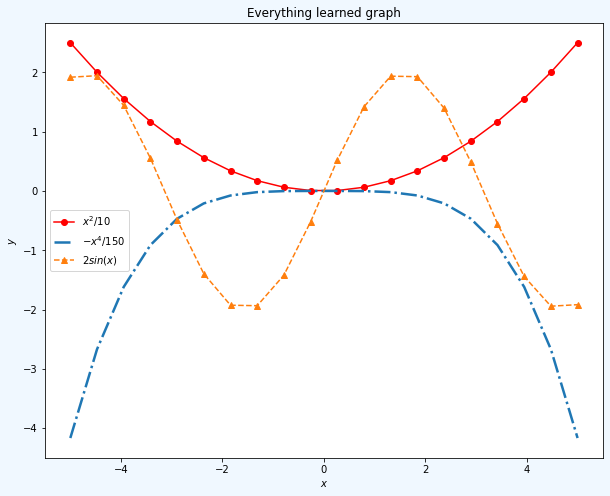

In [67]:
x8 = np.linspace(-5,5,20)
y8a = x8**2/10
y8b = -x8**4/150
y8c = 2*np.sin(x8)

# Figure command must go near the beginning!
plt.figure(figsize=(10,8), facecolor='aliceblue')

plt.title('Everything learned graph')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.plot(x8,y8a,'-ro', label='$x^2/10$' )
plt.plot(x8,y8b,linestyle='dashdot',lw=2.5,label='$-x^4/150$')
plt.plot(x8,y8c,ls='--',marker='^',label='$2sin(x)$')

plt.legend()
plt.show()

We can also annotate the graph using the __.annotate()__ function, which can be very useful to do. Let's take a simpler graph for this though.

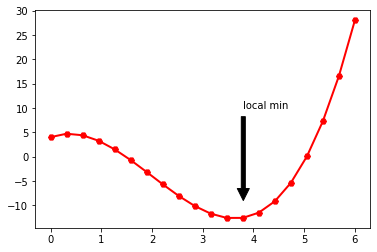

In [85]:
x9 = np.linspace(0,6,20)
y9 = (x9-1)**3 - 3*x9**2 +x9 + 5

plt.annotate('local min', xy=(3.8, -10), xytext=(3.8, 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.plot(x9,y9,color='red',marker='H',lw=2)
plt.show()

Of course, we can also produce multiple subplots if a single graph gets too messy. As expected we use the __.subplot()__ function instead of the __.plot()__ function. 

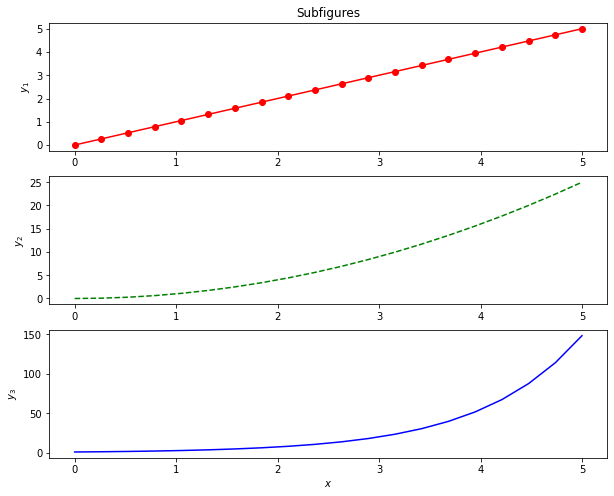

In [92]:
x10 = np.linspace(0,5,20)
y10a = x10
y10b = x10**2
y10c = np.exp(x10)

plt.figure(figsize=(10,8))

plt.subplot(3,1,1) # The syntax is .subplot(rows,columns, fig number)
plt.title('Subfigures') # Note the positon of the title
plt.ylabel('$y_1$')
plt.plot(x10,y10a,'-ro')

plt.subplot(3,1,2)
plt.ylabel('$y_2$')
plt.plot(x10,y10b,'--g')

plt.subplot(3,1,3)
plt.xlabel('$x$') # Note the position of the x 
plt.ylabel('$y_3$')
plt.plot(x10,y10c,'blue')

plt.show()

Text(0.5, 0.98, 'Main Title')

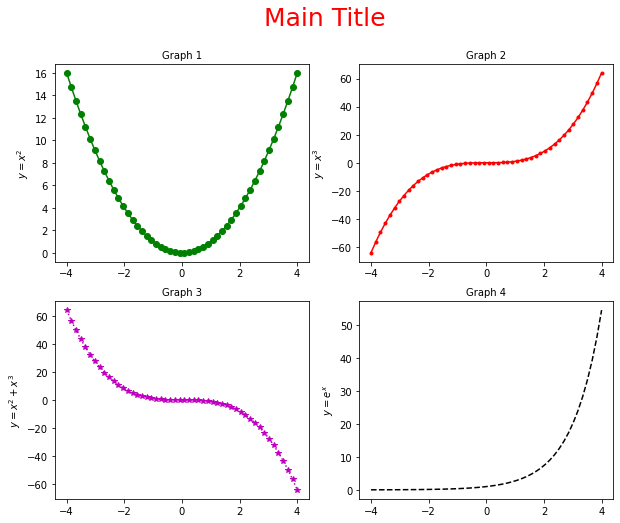

In [98]:
#Subplot
plt.figure(1, figsize=(10,8))
x11=np.linspace(-4,4,50)
y11a=x11**2
y11b=x11**3
y11c=-y11b
y11d=np.exp(x11)

plt.subplot(2,2, 1)
plt.plot(x11, y11a, 'go-')
plt.title('Graph 1', fontsize=10)
plt.ylabel('$y=x^2$')

plt.subplot(2,2, 2) 
plt.plot(x11, y11b, 'r.-')
plt.title('Graph 2', fontsize=10)
plt.ylabel('$y=x^3$')

plt.subplot(2,2,3) 
plt.plot(x11,y11c, 'm*:')
plt.ylabel('$y=x^2+x^3$')
plt.title('Graph 3', fontsize=10)

plt.subplot(2,2,4) 
plt.plot(x11,y11d, 'k--')
plt.title('Graph 4', fontsize=10)
plt.ylabel('$y=e^x$')

#plt.tight_layout() # leaves a space between subplots (try commenting out this line)
plt.suptitle('Main Title', fontsize=25, color = 'red')

If you don't like or want to change the default font that is used, you can always create your own by defining it in dictionary format. Like so, 

In [99]:
my_font = {'family': 'helvetica', # this is the font
'color': 'cornflowerblue', # colour
'weight': 'bold', # normal or bold
'size': 24, # size of font
}

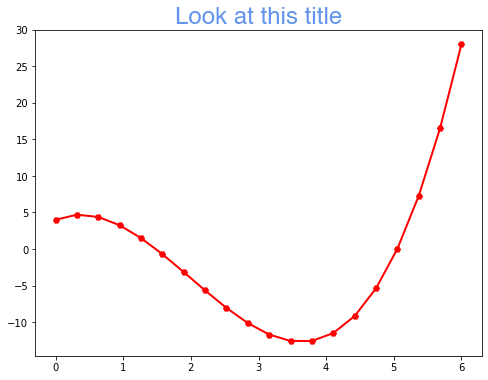

In [100]:
x9 = np.linspace(0,6,20)
y9 = (x9-1)**3 - 3*x9**2 +x9 + 5

plt.figure(figsize=(8,6))
plt.title('Look at this title', fontdict=my_font)

plt.plot(x9,y9,color='red',marker='H',lw=2)
plt.show()

We can also add text to the graph as well. This is slightly different from annotating it. 

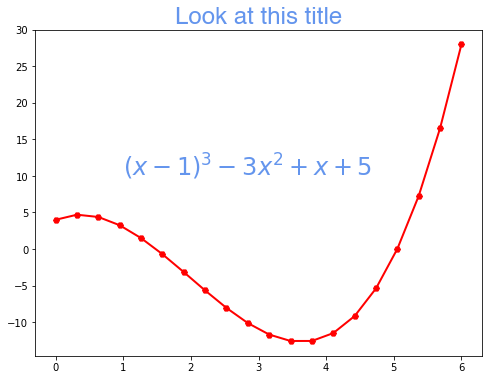

In [102]:
x9 = np.linspace(0,6,20)
y9 = (x9-1)**3 - 3*x9**2 +x9 + 5

plt.figure(figsize=(8,6))
plt.title('Look at this title', fontdict=my_font)

plt.plot(x9,y9,color='red',marker='H',lw=2)
plt.text(1,10, '$(x-1)^{3} - 3x^{2} + x + 5$', fontdict=my_font)
plt.show()

So far we have looked at line graphs. But there are many other types as well, including pie charts, bar charts, and histograms. 

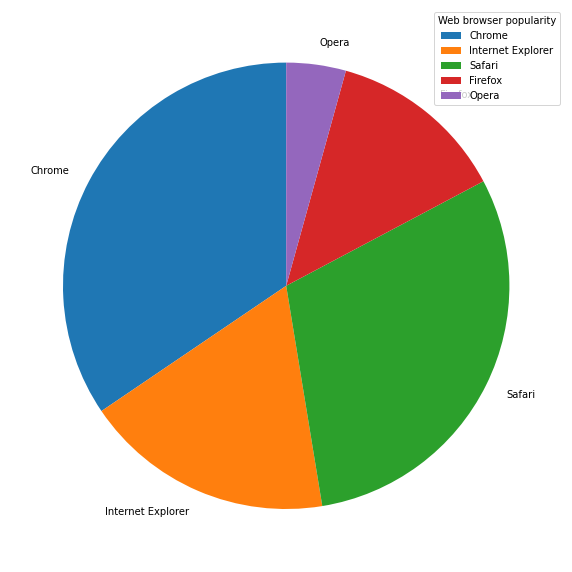

In [113]:
Market_Share = ['Chrome', 'Internet Explorer', 'Safari', 'Firefox', 'Opera'] 
data = [40, 21, 35, 15, 5] 
chart = plt.figure(figsize=(10, 15))
plt.pie(data, labels = Market_Share,startangle = 90);
plt.legend(title='Web browser popularity');

<BarContainer object of 5 artists>

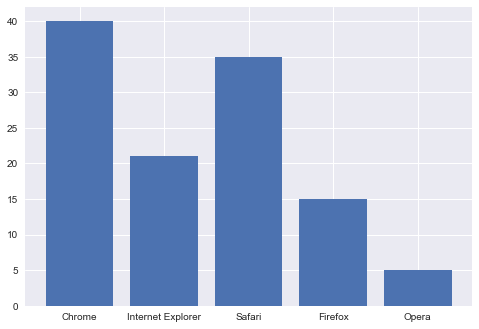

In [119]:
plt.bar(Market_Share, height=data)

In [116]:
import seaborn as sns
plt.style.use('seaborn')

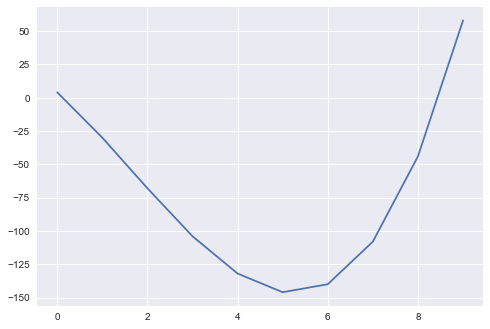

In [117]:
y = [x**3-5*x**2-30*x+4 for x in range(10)]
plt.plot(y); 
plt.show()

## Monte Carlo Simulations for Option Pricing

This section is on Monte Carlo simulations for option pricing. It is very similar to what we have previously done on MATLAB in COMP0043 Numerical Methods for Finance. We will be using the following packages: <br>
* NumPy
* Pandas
* Matplotlib 
<br>
<p> Although the focus is not on the packages themselves. This is covered in a different section. We just need to be able to use them for our purposes.</p>

**Step 1** <br>
We need to import the packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Step 2** <br>
Let us first recap the random numbers available in NumPy. We will need them extensively. <br>
We can use the _random_ subpackage within NumPy to produce standard normally distributed random numbers. <br>
That is $\phi \sim N(0,1)$.

In [2]:
normrnd = np.random.standard_normal(10)
print(len(normrnd))
print(type(normrnd))
print(normrnd)

10
<class 'numpy.ndarray'>
[-0.72403027  1.20148181 -1.07569993 -0.27467358 -0.6982639  -2.26602201
  0.040892    0.49579824 -0.33023499 -1.46086659]


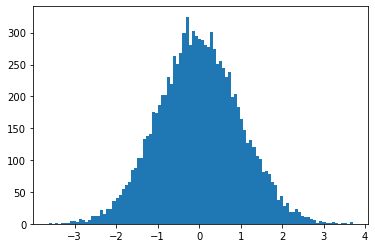

In [10]:
plt.hist(np.random.standard_normal(10000), bins=100);

**Step 3** <br>
To make our lives easier and to reduce the number of times we need to simulate our paths, we will define a
function that takes as inputs the required elements for simulating GBM. 

In [2]:
def simulate_path(s0, mu, sigma, horizon, timesteps, n_sims):
    
    # Set the random seed for reproducibility
    # Same seed leads to the same set of random values
    #np.random.seed(786) 

    # Read parameters
    S0 = s0         # initial spot level
    r = mu          # mu = rf in risk neutral framework 
    T = horizon     # time horizion
    t = timesteps   # number of time steps
    n = n_sims      # number of simulation
    
    # Define dt
    dt = T/t        # length of time interval  
    
    # Simulating 'n' asset price paths with 't' timesteps
    S = np.zeros((t, n))
    S[0] = S0

    for i in range(0, t-1):
        phi = np.random.standard_normal(n)                                                   # psuedo random numbers
        #S[i+1] = S[i] * (1 + r * dt + sigma * sqrt(dt) * phi)                            # vectorized operation per timesteps
        S[i+1] = S[i] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * phi)         # alternate form
       # print(S)
        
    return S

In [15]:
import numpy as np
def simulate_path1(s0, mu, sigma, horizon, timesteps, n_sims):

    # Read parameters
    S0 = s0         # initial spot level
    r = mu          # mu = rf in risk neutral framework 
    T = horizon     # time horizion
    t = timesteps   # number of time steps
    n = n_sims      # number of simulation
    
    # Define dt
    dt = T/t        # length of time interval 
    
    # Generate paths
    phi = np.random.standard_normal((t,n))

    X = np.cumsum((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*phi, axis=0)
    
    S = S0*np.exp(X)
    
    return S

**Note:** This function is purely the underlying asset, so we can use this to price any option contract we wish. <br>
**Note:** In this example the paths are the columns and the timesteps are rows. Hence, this is a **_vertical_** interpretation of Monte Carlo. 

**Step 4** <br>
We will now produce some paths and format them in a way that we can easily use.

In [16]:
stock_path = simulate_path1(100,0.05,0.2,1,252,10)

In [17]:
import pandas as pd
# Assign simulated price path to dataframe for analysis and plotting
price_path = pd.DataFrame(simulate_path1(100, 0.05, 0.20, 1, 252, 10000))

# Verify the generated price paths
price_path.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,98.734357,99.935316,101.383665,101.121300,101.219670,100.254052,102.316870,100.775567,100.155375,99.109067,...,102.217764,100.009134,99.670353,101.081624,97.991533,98.139339,102.646529,99.509640,101.974137,99.425966
1,101.722070,99.362638,101.780702,101.079293,100.236713,101.085314,102.801502,97.722286,98.981421,100.231906,...,100.961174,100.353380,101.299823,100.058218,97.350974,97.500479,103.068693,99.004477,101.497898,99.225479
2,100.586242,98.519820,104.551822,98.757577,100.189788,101.273067,103.030849,98.486522,102.962540,100.745933,...,101.252013,100.010368,103.175692,99.799302,96.383708,99.417152,101.858040,100.047350,100.484352,98.834992
3,100.781216,97.976002,105.561505,99.929315,100.998407,100.147397,101.973117,97.696650,102.198337,102.520522,...,104.238246,102.035118,101.706103,100.414995,96.237452,99.752655,102.332468,98.094487,103.032976,100.477982
4,99.581651,100.343769,106.699619,99.319506,102.264103,100.898102,103.225851,97.781947,102.443436,102.563460,...,102.563039,101.286185,102.119759,98.143654,94.694907,99.494591,102.122793,98.023487,102.553860,98.915997


In [24]:
# This gives the mean value of each path
price_path.mean(axis=0)

0       113.584600
1        90.469377
2       104.389930
3        89.819254
4        89.658917
           ...    
9995     89.228570
9996    103.646562
9997     95.784284
9998    105.161117
9999     89.354218
Length: 10000, dtype: float64

In [26]:
# This gives the mean value of each time step – we can see this from the 0th row being 100. 
price_path.mean(axis=1)

0      100.000000
1      100.031591
2      100.036379
3      100.041073
4      100.047569
          ...    
247    104.927196
248    104.925152
249    104.941518
250    104.978124
251    104.998147
Length: 252, dtype: float64

**Step 5** <br>
Let's take a look at some histograms and sample paths.

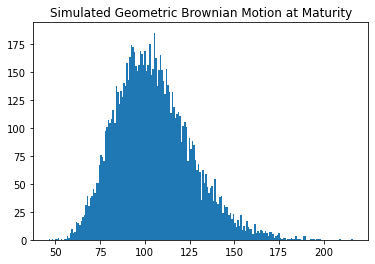

In [28]:
# Plot the histogram of the simulated price path at maturity
plt.hist(price_path.iloc[-1], bins=200);
plt.title('Simulated Geometric Brownian Motion at Maturity');

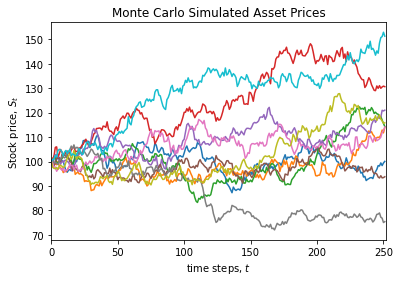

In [29]:
# Plot initial 100 simulated path using matplotlib
S =  simulate_path(100, 0.05, 0.20, 1, 252, 10)
plt.plot(S[:,:100])
plt.grid(False)
plt.xlabel('time steps, $t$')
plt.xlim(0,252)
plt.ylabel('Stock price, $S_t$')
plt.title('Monte Carlo Simulated Asset Prices');
plt.show()

**Step 6** <br>
Now comes the part where we actually price some derivatives... <br>
You will need to look elsewhere (e.g. COMP0048 Financial Engineering) for the actual formulas for pricing each of the options. 

In [4]:
# Call the simulation function
S = simulate_path(75, 0.05, 0.20, 2, 100, 10000)

# Define parameters
K = 80.; r = 0.05; T = 2; 

# Calculate the discounted value of the expeced payoff
Call = np.exp(-r*T)* np.mean(np.maximum(S[-1] - K, 0))
Put = np.exp(-r*T)* np.mean(np.maximum(K - S[-1], 0))
C1=np.exp(-r*T)*np.mean(np.heaviside(S[-1]-K,0))
P1=np.exp(-r*T)*np.mean(np.heaviside(K-S[-1],0))

# Exercise include a binray put
# Test the put-call parity for binaries
# Print the values
print(f'European Call Option Value: {Call:0.4f}')
print(f'European Put Option Value: {Put:0.4f}')
print(f'Binary Call Option Value: {C1:0.4f}')
print(f'Binary Put Option Value: {P1:0.4f}')

European Call Option Value: 9.5965
European Put Option Value: 7.0816
Binary Call Option Value: 0.4448
Binary Put Option Value: 0.4600


**And beyond...** <br>
We can use what we have created so far to price exotic options as well. <br>
Let's take a look at the different Asian options.

#### Asian Options (Recap)
Asian options rely on averaging over the term of the option. <br>
There are two types of Asian option:
* Fixed strike - i.e. $K$ is fixed and the average is used as the price $S_A$.
* Fixed price - i.e. $S$ is fixed and the average is used as the strike $K_A$.

In [40]:
# We need to import the geometric mean from SciPy.stats
from scipy.stats import gmean

# =======================
# General Option Setup
# =======================

# Call the simulation function
S = simulate_path(100, 0.05, 0.20, 1, 252, 100000)

# Define parameters
K = 100.; r = 0.05; T = 1; t0=0

# =======================
# Arithmetic & Geometric Average
# =======================

# Arithmetic average price
A = S.mean(axis=0)   

# Geometric average price
A_g = gmean(S)

# =======================
# Arithmetic Average Call & Put
# =======================

# Fixed Strike (K)
# Calculate the discounted value of the expeced payoff
A_call = np.exp(-r*(T-t0)) * np.mean(np.maximum(A - K, 0)) # mean is for present value which is for discounting
A_put = np.exp(-r*(T-t0)) * np.mean(np.maximum(K - A, 0))

# Fixed Price (S)
A_call_ = np.exp(-r*(T-t0)) * np.mean(np.maximum(S[-1] - A, 0))
A_put_ = np.exp(-r*(T-t0)) * np.mean(np.maximum(A - S[-1], 0))

# =======================
# Geometric Average Call & Put
# =======================

# Fixed Strike (K)
# Calculate the discounted value of the expeced payoff
C0 = np.exp(-r*T) * np.mean(np.maximum(A_g - K, 0)) # mean is for present value which is for discounting
P0 = np.exp(-r*T) * np.mean(np.maximum(K - A_g, 0))

# Fixed Price (S)
C0_ = np.exp(-r*T) * np.mean(np.maximum(S[-1] - A_g, 0)) # mean is for present value which is for discounting
P0_ = np.exp(-r*T) * np.mean(np.maximum(A_g - S[-1], 0))

# Print the values
print('__Fixed *Strike* Asian Options__')
print(f'Arithmetic mean Asian Call Option Value: {A_call:0.4f}')
print(f'Arithmetic mean Asian Put Option Value: {A_put:0.4f}')
print(f'Geometric mean Asian Call Option Value: {C0:0.4f}')
print(f'Geometric mean Asian Put Option Value: {P0:0.4f}')

print('\n __Fixed *Price* Asian Options__')
print(f'Arithmetic mean Asian Call Option Value: {A_call_:0.4f}')
print(f'Arithmetic mean Asian Put Option Value: {A_put_:0.4f}')
print(f'Geometric mean Asian Call Option Value: {C0_:0.4f}')
print(f'Geometric mean Asian Put Option Value: {P0_:0.4f}')

__Fixed *Strike* Asian Options__
Arithmetic mean Asian Call Option Value: 5.7360
Arithmetic mean Asian Put Option Value: 3.3384
Geometric mean Asian Call Option Value: 5.5211
Geometric mean Asian Put Option Value: 3.4558

 __Fixed *Price* Asian Options__
Arithmetic mean Asian Call Option Value: 5.8250
Arithmetic mean Asian Put Option Value: 3.3692
Geometric mean Asian Call Option Value: 6.0323
Geometric mean Asian Put Option Value: 3.2442


#### Lookback Options

In [51]:
# =======================
# General Option Setup
# =======================

S0 = 1
r = 0.1
sigma = 0.3
T = 0.5
t = 50
n = 100000
t0 = 0
K = 1

# Call the simulation function
S = simulate_path(S0, r, sigma, T, t, n)

# Find the minimum and maximum of each path
S_max = np.zeros((1, n))
S_min = np.zeros((1, n))

for i in range(0,n):
    S_max[0][i] = max(S[:,i])
    S_min[0][i] = min(S[:,i])

# Calculate the discounted value of the expeced payoff
# Call on the minumum
LB_Call = np.exp(-r*T)* np.mean(np.maximum(S_max - K, 0))
# Put on the maximum
LB_Put = np.exp(-r*T)* np.mean(np.maximum(K - S_min, 0))

# Print the results
print(f'Lookback Call Option Value: {LB_Call:0.4f}')
print(f'Lookback Put Option Value: {LB_Put:0.4f}')

Lookback Call Option Value: 0.1812
Lookback Put Option Value: 0.1163


#### Barrier Options

In [8]:
import numpy as np
# =======================
# General Option Setup
# =======================

S0 = 100
r = 0.05
sigma = 0.2
T = 1
t = 252
n = 100000
t0 = 0
K = 100

# Barriers
upper = 120
lower = 120
#option_type = 8

for option_type in range(1,9):
    
    # Call the simulation function
    S = simulate_path(S0, r, sigma, T, t, n)
    
    # Up-and-Out Call
    if option_type == 1:
        for j in range(0,n): # simulations (columns)
            for k in range(0,t): # timesteps (rows) 
                if S[k][j] > upper:
                    S[-1][j] = 0
                else:
                    continue
        U_O_Call = np.exp(-r*T)* np.mean(np.maximum(S[-1] - K, 0))
        print(f'Up-and-Out Call Option Value: {U_O_Call:0.4f}')

    # Up-and-Out Put
    elif option_type == 2:
        for j in range(0,n): # simulations (columns)
            for k in range(0,t): # timesteps (rows) 
                if S[k][j] > upper:
                    S[-1][j] = K+1
                else:
                    continue
        U_O_Put = np.exp(-r*T)*np.mean(np.maximum(K - S[-1], 0))
        print(f'Up-and-Out Put Option Value: {U_O_Put:0.4f}')

    # Down-and-Out Call
    elif option_type == 3:
        for j in range(0,n): # simulations (columns)
            for k in range(0,t): # timesteps (rows) 
                if S[k][j] < lower:
                    S[-1][j] = 0
                else:
                    continue
        D_O_Call = np.exp(-r*T)* np.mean(np.maximum(S[-1] - K, 0))
        print(f'Down-and-Out Call Option Value: {D_O_Call:0.4f}')    

    # Down-and-Out Put
    elif option_type == 4:
        for j in range(0,n): # simulations (columns)
            for k in range(0,t): # timesteps (rows) 
                if S[k][j] < lower:
                    S[-1][j] = K+1
                else:
                    continue
        D_O_Put = np.exp(-r*T)*np.mean(np.maximum(K - S[-1], 0))
        print(f'Down-and-Out Put Option Value: {D_O_Put:0.4f}')

    # Up-and-In Call
    elif option_type == 5:
        for j in range(0,n): # simulations (columns)
            if max(S[:,j]) < upper:
                S[-1][j] = 0
            else:
                continue
        U_I_Call = np.exp(-r*T)* np.mean(np.maximum(S[-1] - K, 0))
        print(f'Up-and-In Call Option Value: {U_I_Call:0.4f}')

    # Up-and-In Put
    elif option_type == 6:
        for j in range(0,n): # simulations (columns)
            if max(S[:,j]) < upper:
                S[-1][j] = K+1
            else:
                continue
        U_I_Put = np.exp(-r*T)* np.mean(np.maximum(K - S[-1], 0))
        print(f'Up-and-In Put Option Value: {U_I_Put:0.4f}')

    # Down-and-In Call
    elif option_type == 7:
        for j in range(0,n): # simulations (columns)
            if min(S[:,j]) > lower:
                S[-1][j] = 0
            else:
                continue
        D_I_Call = np.exp(-r*T)* np.mean(np.maximum(S[-1] - K, 0))
        print(f'Down-and-In Call Option Value: {D_I_Call:0.4f}')

    # Down-and-In Put
    elif option_type == 8:
        for j in range(0,n): # simulations (columns)
            if min(S[:,j]) > lower:
                S[-1][j] = K+1
            else:
                continue
        D_I_Put = np.exp(-r*T)* np.mean(np.maximum(K - S[-1], 0))
        print(f'Down-and-In Put Option Value: {D_I_Put:0.4f}')

Up-and-Out Call Option Value: 1.3296
Up-and-Out Put Option Value: 5.3773
Down-and-Out Call Option Value: 0.0000
Down-and-Out Put Option Value: 0.0000
Up-and-In Call Option Value: 9.0242
Up-and-In Put Option Value: 0.1859
Down-and-In Call Option Value: 10.5203
Down-and-In Put Option Value: 5.6164


## Monte Carlo Simulations for Integration

See notebook for substitutions. Here we will test some examples.

**Example 1** <br>
Trivial example <br>
\begin{equation*}
\int_{0}^{7} x^3 + \frac{3}{x+1} dx = 606.5
\end{equation*}

We have:
* a = 0
* b = 7
So (b-a) = 7 <br>
Transformation is:
\begin{equation*}
(b-a) \mathbb{E} f((b-a)U + a) = 7 \cdot \mathbb{E} f(7U)
\end{equation*}


In [45]:
N = 10000
u = np.random.rand(N)
#.  (b-a)*U + a      --- the inner part of f(...)
u = (7-0)*u + 0
fnc = (u**3 + 3/(u+1))
theta_hat = 7*np.mean(fnc)
print(theta_hat)

605.6858835335994


**Example 2** <br>
Example from the Monte Carlo Jupyter Notebook. <br>
\begin{equation*}
\theta = \int_{0}^{\infty} e^{-x^3} dx
\end{equation*}
Which becomes: <br>
\begin{equation*}
\mathbb{E}\left[ \frac{1}{U^{2}}e^{-\left( -1+1/U\right) ^{3}}\right]
\end{equation*}

In [47]:
N = 10000
u1 = np.random.rand(N)
expon = (-1 + 1/u1)**3
func = (1/(u1**2)) * np.exp(-1*expon)
theta_hat1 = np.mean(func)
print(theta_hat1)

0.8887923950577611


**Example 3** <br>
The last example in the Monte Carlo Jupyter Notebook. <br>

Now consider evaluating the Gaussian integral
\begin{equation*}
J=\frac{1}{\sqrt{2\pi }}\int\nolimits_{-\infty }^{\infty }x^{2}\exp \left(
-x^{2}/2\right) dx = 1 
\end{equation*}

by writing this as 
\begin{equation*}
J=\mathbb{E}[X^{2}]\sim J_{N}=\frac{1}{N}\underset{n=1}{\overset{N}{\sum }}x_{n}^{2}.
\end{equation*}


We can notice that the integral $J$ is symmetric, so we only need to conisder the positive side and double the outcome. 

We can rewrite J as:
\begin{equation*}
    \frac{2}{\sqrt{2 \pi}} \int_{0}^{1} (-1 + \frac{1}{y})^{2} e^{\frac{-1}{2} ( -1 + \frac{1}{y})^{2}} \frac{1}{y^2} dy
\end{equation*}


In [55]:
u2 = np.random.rand(10000)
func = (-1 + 1/u2)**2 * np.exp(-0.5*(-1 + 1/u2)**2) * (1/u2**2)
theta_hat = (2/np.sqrt(2*np.pi)) * np.mean(func)
print(theta_hat)

1.001532797711706


**Exercise** <br>
From Monte Carlo Jupyter Notebook. <br>
Consider the process
\begin{equation*}
X_{t}=xe^{-\kappa t}+\theta \left( 1-e^{-\kappa t}\right) +\sigma \sqrt{%
\frac{1-e^{-\kappa t}}{2\kappa }}\phi 
\end{equation*}
where $X_{0}=x$ and $\phi \sim N\left( 0,1\right) .$ $\kappa $ is the speed, 
$\theta $ is the mean and $\sigma $ the volatility.

Take the following parameters 
\begin{equation*}
x=1;\ \kappa =1;\ \theta =1;\ \sigma =0.5
\end{equation*}
By running simulations of $X_{t}$ calculate the mean and compare with $\mathbb{E}\left[ X_{t}\right] .$

In [72]:
def process_sim(X0, kappa, theta, sigma, time, num_sim):
    
    x = X0 # Starting value
    k = kappa # Speed value
    theta = theta # Mean value
    sigma = sigma # Volatility
    t = time # Number of timesteps
    n = num_sim # Number of simulations
    
    # Create an empty matrix for storage of our paths
    paths = np.zeros((1,n))
    paths[0] = x
        
    # Normally distributed random numbers
    phi = np.random.standard_normal(n)
        
    # Formula from the question
    paths = x*np.exp(-1*k*t) + theta*(1-np.exp(-1*k*t)) + sigma*np.sqrt((1-np.exp(-1*k*t))/(2*k))*phi
        
    return paths

In [84]:
P = process_sim(1,1,1,0.5,1,10000)
print(P.shape)
print(P.mean())

(10000,)
0.9988989501020453


In [82]:
# Not sure this works like this...
'''
def monte_carlo_process(X0, kappa, theta, sigma, time, num_sim):

    x = X0 # Starting value
    k = kappa # Speed value
    theta = theta # Mean value
    sigma = sigma # Volatility
    t = time # Number of timesteps
    n = num_sim # Number of uniform random numbers

    # Draw random numbers
    u = np.random.rand(n)
    
    # Calculate the normal integral
    func = (1/u**2) * np.exp(-0.5*(-1 + 1/u)**2)
    func = (2/np.sqrt(2*np.pi)) * func.mean()
    print(func)
    
    # Calculate the process
    EX = x*np.exp(-1*k*t) + theta*(1-np.exp(-1*k*t)) + func*sigma*np.sqrt((1-np.exp(-1*k*t))/(2*k))
    
    return EX
'''

In [83]:
P1 = monte_carlo_process(1,1,1,0.5,1,10000)
print(P1)

0.9908227265113796
1.2785164965972338


In [7]:
import numpy as np

# Exepctation
u1 = np.random.rand(10000)
func = (1/u1**2)*(-1 + 1/u1) * np.exp(-0.5*(-1 + 1/u1)**2)
theta_hat = (1/np.sqrt(2*np.pi)) * np.mean(func)
print(theta_hat - theta_hat)
print(theta_hat)

0.0
0.39748463284633156


In [4]:
# Variance
u2 = np.random.rand(10000)
func = (1/u2**2)*(-1 + 1/u2)**2 * np.exp(-0.5*(-1 + 1/u2)**2)
theta_hat = (2/np.sqrt(2*np.pi)) * np.mean(func)
print(theta_hat)

0.9793073581831635


In [3]:
# Skewness
u3 = np.random.rand(10000)
func = (1/u3**2)*(-1 + 1/u3)**3 * np.exp(-0.5*(-1 + 1/u3)**2)
theta_hat = (1/np.sqrt(2*np.pi)) * np.mean(func)
print(theta_hat - theta_hat)

0.0


In [6]:
# Kurtosis
u4 = np.random.rand(10000)
func = (1/u4**2)*(-1 + 1/u4)**4 * np.exp(-0.5*(-1 + 1/u4)**2)
theta_hat = (2/np.sqrt(2*np.pi)) * np.mean(func)
print(theta_hat)

2.9475900828549744
